In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import folium 
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans


In [19]:
df = pd.read_csv('TRT_geo.csv')

In [20]:
df.head(10)


,Borough,Neighborhood,Latitude,Longitude
0,Scarborough,Malvern / Rouge,43.806686,-79.194353
1,Scarborough,Rouge Hill / Port Union / Highland Creek,43.784535,-79.160497
2,Scarborough,Guildwood / Morningside / West Hill,43.763573,-79.188711
3,Scarborough,Woburn,43.770992,-79.216917
4,Scarborough,Cedarbrae,43.773136,-79.239476
5,Scarborough,Scarborough Village,43.744734,-79.239476
6,Scarborough,Kennedy Park / Ionview / East Birchmount Park,43.727929,-79.262029
7,Scarborough,Golden Mile / Clairlea / Oakridge,43.711112,-79.284577
8,Scarborough,Cliffside / Cliffcrest / Scarborough Village West,43.716316,-79.239476
9,Scarborough,Birch Cliff / Cliffside West,43.692657,-79.264848


In [21]:
trt_latitude = df['Latitude'].mean()
trt_longitude = df['Longitude'].mean()
print("Latitude and Longitude of Toronto are : ",trt_latitude,trt_longitude)

Latitude and Longitude of Toronto are :  43.70460773398059 -79.39715291165048


In [22]:
CLIENT_ID = 'YANZIUUV1UJLFUJRQXD1RP0Z2GFAOLQWAE14R50KKC5WWMVC'
CLIENT_SECRET = '34MG4GPENPPAKQC4CZPROXXXZM4G34C5RPFSYCT3LCTLIWGE'
VERSION = '20180606'
LIMIT = 150

In [23]:
unique_boroughs_of_trt = df['Borough'].unique().tolist()

In [24]:
unique_boroughs_of_trt

['Scarborough',
 'North York',
 'East York',
 'East Toronto',
 'Central Toronto',
 'Downtown Toronto',
 'York',
 'West Toronto',
 'Mississauga',
 'Etobicoke']

In [25]:
borough_colors ={}
for i in unique_boroughs_of_trt:
    borough_colors[i] = '#%02X%02X%02X' % tuple(np.random.choice(range(256),size=3))

In [26]:
borough_colors

{'Scarborough': '#FE8396',
 'North York': '#68227F',
 'East York': '#3892C6',
 'East Toronto': '#155765',
 'Central Toronto': '#07B5AB',
 'Downtown Toronto': '#3E71C6',
 'York': '#04ACAD',
 'West Toronto': '#4EA9E4',
 'Mississauga': '#353517',
 'Etobicoke': '#821D9C'}

In [27]:
trt_map = folium.Map(location=[trt_latitude,trt_longitude],zoom_start=12,control_scale=True)

In [29]:
for lat,lng,boro,nei in zip(df['Latitude'],
                           df['Longitude'],
                           df['Borough'],
                           df['Neighborhood']):
    label_text = boro + ' - ' + nei
    label = folium.Popup(label_text,parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    tooltip = label_text,
    radius = 4,
    popup = label,
    color=borough_colors[boro],
    fill=True,
    fill_color = borough_colors[boro],
    fill_opacity=0.7).add_to(trt_map)

In [30]:
trt_map

## Exploring bangalore Neighborhoods using FourSquare API

In [31]:
def getNearbyVenues(names, boro, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, boro, lat, lng in zip(names, boro, latitudes, longitudes):
        print("Fetching venues for : ",name)            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            boro,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',
                             'Borough',
                             'Neighborhood Latitude', 
                             'Neighborhood Longitude', 
                             'Venue', 
                             'Venue Latitude', 
                             'Venue Longitude', 
                             'Venue Category']
    
    return(nearby_venues)

In [32]:
trt_venues = getNearbyVenues(names=df['Neighborhood'],latitudes=df['Latitude'],longitudes=df['Longitude'],boro=df['Borough'])

Fetching venues for :  Malvern / Rouge
Fetching venues for :  Rouge Hill / Port Union / Highland Creek
Fetching venues for :  Guildwood / Morningside / West Hill
Fetching venues for :  Woburn
Fetching venues for :  Cedarbrae
Fetching venues for :  Scarborough Village
Fetching venues for :  Kennedy Park / Ionview / East Birchmount Park
Fetching venues for :  Golden Mile / Clairlea / Oakridge
Fetching venues for :  Cliffside / Cliffcrest / Scarborough Village West
Fetching venues for :  Birch Cliff / Cliffside West
Fetching venues for :  Dorset Park / Wexford Heights / Scarborough Town Centre
Fetching venues for :  Wexford / Maryvale
Fetching venues for :  Agincourt
Fetching venues for :  Clarks Corners / Tam O'Shanter / Sullivan
Fetching venues for :  Milliken / Agincourt North / Steeles East / L'Amoreaux East
Fetching venues for :  Steeles West / L'Amoreaux West
Fetching venues for :  Upper Rouge
Fetching venues for :  Hillcrest Village
Fetching venues for :  Fairview / Henry Farm / Or

In [35]:

print("Total number of venues found in Toronto are : ",trt_venues.shape[0])

Total number of venues found in Toronto are :  2115


In [34]:
trt_venues.head(5)

,Neighborhood,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Malvern / Rouge,Scarborough,43.806686,-79.194353,Wendy’s,43.807448,-79.199056,Fast Food Restaurant
1,Rouge Hill / Port Union / Highland Creek,Scarborough,43.784535,-79.160497,RIGHT WAY TO GOLF,43.785177,-79.161108,Golf Course
2,Rouge Hill / Port Union / Highland Creek,Scarborough,43.784535,-79.160497,Royal Canadian Legion,43.782533,-79.163085,Bar
3,Guildwood / Morningside / West Hill,Scarborough,43.763573,-79.188711,G & G Electronics,43.765309,-79.191537,Electronics Store
4,Guildwood / Morningside / West Hill,Scarborough,43.763573,-79.188711,Big Bite Burrito,43.766299,-79.190720,Mexican Restaurant


In [36]:
trt_venues.groupby('Venue Category').count()['Neighborhood'].sort_values(ascending=False).head(10)

Venue Category
Coffee Shop            175
Café                    97
Restaurant              70
Italian Restaurant      52
Park                    49
Pizza Place             47
Hotel                   42
Sandwich Place          40
Japanese Restaurant     39
Bakery                  37
Name: Neighborhood, dtype: int64

In [37]:
print("Total number of unique categories in toronto are : ",len(trt_venues['Venue Category'].unique()))

Total number of unique categories in toronto are :  267


## Getting number of venues per neighborhood

In [38]:
individual_trt_venue_count = trt_venues.groupby(['Borough','Neighborhood'])['Borough'].count().to_frame()

In [39]:
individual_trt_venue_count

Borough
Borough         Neighborhood                                               
Central Toronto Davisville                                               36
                Davisville North                                          7
                Forest Hill North & West                                  5
                Lawrence Park                                             3
                Moore Park / Summerhill East                              1
...                                                                     ...
York            Caledonia-Fairbanks                                       4
                Del Ray / Mount Dennis / Keelsdale and Silverthorn        4
                Humewood-Cedarvale                                        4
                Runnymede / The Junction North                            4
                Weston                                                    1

[94 rows x 1 columns]

In [40]:
individual_trt_venue_count.rename(columns={'Borough':'NumberOfVenues'},inplace=True)

In [41]:
individual_trt_venue_count.reset_index(inplace=True)

In [42]:
individual_trt_venue_count

,Borough,Neighborhood,NumberOfVenues
0,Central Toronto,Davisville,36
1,Central Toronto,Davisville North,7
2,Central Toronto,Forest Hill North & West,5
3,Central Toronto,Lawrence Park,3
4,Central Toronto,Moore Park / Summerhill East,1
...,...,...,...
89,York,Caledonia-Fairbanks,4
90,York,Del Ray / Mount Dennis / Keelsdale and Silvert...,4
91,York,Humewood-Cedarvale,4
92,York,Runnymede / The Junction North,4


[Text(0, 0, 'Davisville'),
 Text(0, 0, 'Davisville North'),
 Text(0, 0, 'Forest Hill North & West'),
 Text(0, 0, 'Lawrence Park'),
 Text(0, 0, 'Moore Park / Summerhill East'),
 Text(0, 0, 'North Toronto West'),
 Text(0, 0, 'Roselawn'),
 Text(0, 0, 'Summerhill West / Rathnelly / South Hill / Forest Hill SE / Deer Park'),
 Text(0, 0, 'The Annex / North Midtown / Yorkville'),
 Text(0, 0, 'Berczy Park'),
 Text(0, 0, 'CN Tower / King and Spadina / Railway Lands / Harbourfront West / Bathurst Quay / South Niagara / Island airport'),
 Text(0, 0, 'Central Bay Street'),
 Text(0, 0, 'Christie'),
 Text(0, 0, 'Church and Wellesley'),
 Text(0, 0, 'Commerce Court / Victoria Hotel'),
 Text(0, 0, 'First Canadian Place / Underground city'),
 Text(0, 0, 'Garden District, Ryerson'),
 Text(0, 0, 'Harbourfront East / Union Station / Toronto Islands'),
 Text(0, 0, 'Kensington Market / Chinatown / Grange Park'),
 Text(0, 0, "Queen's Park / Ontario Provincial Government"),
 Text(0, 0, 'Regent Park / Harbourfr

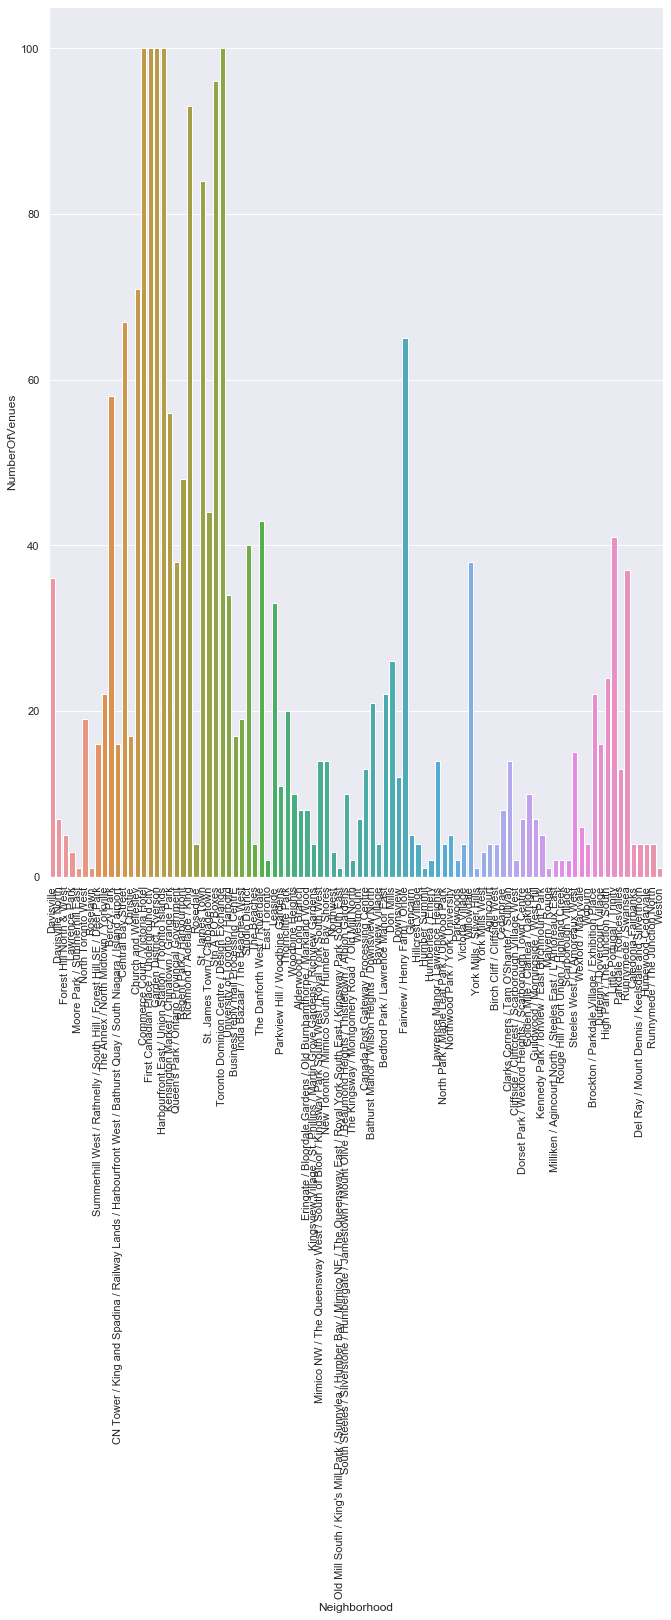

In [43]:
sns.set(rc={'figure.figsize':(11,16)})
plot = sns.barplot(x='Neighborhood',y='NumberOfVenues',data=individual_trt_venue_count)
plot.set_xticklabels(individual_trt_venue_count['Neighborhood'],rotation=90)

In [44]:
trt_venues[trt_venues['Neighborhood']=='Davisville']

,Neighborhood,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
489,Davisville,Central Toronto,43.704324,-79.38879,Jules Cafe Patisserie,43.704138,-79.388413,Dessert Shop
490,Davisville,Central Toronto,43.704324,-79.38879,Thobors Boulangerie Patisserie Café,43.704514,-79.388616,Café
491,Davisville,Central Toronto,43.704324,-79.38879,Viva Napoli,43.705752,-79.389125,Pizza Place
492,Davisville,Central Toronto,43.704324,-79.38879,Marigold Indian Bistro,43.702881,-79.388008,Indian Restaurant
493,Davisville,Central Toronto,43.704324,-79.38879,XO Gelato,43.705177,-79.388793,Dessert Shop
494,Davisville,Central Toronto,43.704324,-79.38879,Zee Grill,43.704985,-79.388476,Seafood Restaurant
495,Davisville,Central Toronto,43.704324,-79.38879,Starbucks,43.705940,-79.389410,Coffee Shop
496,Davisville,Central Toronto,43.704324,-79.38879,June Rowlands Park,43.700517,-79.389189,Park
497,Davisville,Central Toronto,43.704324,-79.38879,Sakae Sushi,43.704944,-79.388704,Sushi Restaurant
498,Davisville,Central Toronto,43.704324,-79.38879,Florentia Ristorante,43.703594,-79.387985,Italian Restaurant



## One hot encoding for letting us to compare different venues based on some common scale

In [45]:
trt_venues_onehot = pd.get_dummies(trt_venues[['Venue Category']])

In [46]:
trt_venues_onehot

,Venue Category_Accessories Store,Venue Category_Airport,Venue Category_Airport Food Court,Venue Category_Airport Lounge,Venue Category_Airport Service,Venue Category_Airport Terminal,Venue Category_American Restaurant,Venue Category_Antique Shop,Venue Category_Aquarium,Venue Category_Art Gallery,...,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Video Game Store,Venue Category_Video Store,Venue Category_Vietnamese Restaurant,Venue Category_Warehouse Store,Venue Category_Wine Bar,Venue Category_Wine Shop,Venue Category_Wings Joint,Venue Category_Women's Store,Venue Category_Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2111,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2112,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2113,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
trt_venues_onehot['Neighborhood'] = trt_venues['Neighborhood']
trt_venues_grouped = trt_venues_onehot.groupby('Neighborhood').mean().reset_index()
trt_venues_grouped

,Neighborhood,Venue Category_Accessories Store,Venue Category_Airport,Venue Category_Airport Food Court,Venue Category_Airport Lounge,Venue Category_Airport Service,Venue Category_Airport Terminal,Venue Category_American Restaurant,Venue Category_Antique Shop,Venue Category_Aquarium,...,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Video Game Store,Venue Category_Video Store,Venue Category_Vietnamese Restaurant,Venue Category_Warehouse Store,Venue Category_Wine Bar,Venue Category_Wine Shop,Venue Category_Wings Joint,Venue Category_Women's Store,Venue Category_Yoga Studio
0,Agincourt,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,Alderwood / Long Branch,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,Bathurst Manor / Wilson Heights / Downsview North,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.047619,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,Bayview Village,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,Bedford Park / Lawrence Manor East,0.0,0.0,0.0,0.0,0.0,0.0,0.045455,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,Willowdale,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.026316,0.0,0.0,0.0,0.0,0.0,0.0
90,Woburn,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
91,Woodbine Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.100000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
92,York Mills / Silver Hills,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
number_of_top_venues = 5

In [49]:
for hood in trt_venues_grouped['Neighborhood']:
    print('---------',hood,'---------')
    temp = trt_venues_grouped[trt_venues_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['Venue','Frequency']
    temp = temp.iloc[1:]
    temp['Frequency'] = temp['Frequency'].astype(float)
    temp = temp.round({'Frequency': 2})
    print(temp.sort_values('Frequency', ascending=False).reset_index(drop=True).head(number_of_top_venues))
    print('\n')

--------- Agincourt ---------
                                      Venue  Frequency
0                     Venue Category_Lounge       0.25
1             Venue Category_Breakfast Spot       0.25
2  Venue Category_Latin American Restaurant       0.25
3         Venue Category_Chinese Restaurant       0.25
4          Venue Category_Accessories Store       0.00


--------- Alderwood / Long Branch ---------
                           Venue  Frequency
0     Venue Category_Pizza Place       0.25
1        Venue Category_Pharmacy       0.12
2             Venue Category_Gym       0.12
3  Venue Category_Sandwich Place       0.12
4    Venue Category_Skating Rink       0.12


--------- Bathurst Manor / Wilson Heights / Downsview North ---------
                           Venue  Frequency
0            Venue Category_Bank       0.10
1     Venue Category_Coffee Shop       0.10
2        Venue Category_Pharmacy       0.05
3  Venue Category_Sandwich Place       0.05
4      Venue Category_Restaurant      

4          Venue Category_Pizza Place        0.2


--------- Golden Mile / Clairlea / Oakridge ---------
                         Venue  Frequency
0        Venue Category_Bakery        0.2
1      Venue Category_Bus Line        0.2
2  Venue Category_Intersection        0.1
3          Venue Category_Park        0.1
4  Venue Category_Soccer Field        0.1


--------- Guildwood / Morningside / West Hill ---------
                                Venue  Frequency
0   Venue Category_Mexican Restaurant       0.14
1    Venue Category_Electronics Store       0.14
2                 Venue Category_Bank       0.14
3  Venue Category_Rental Car Location       0.14
4         Venue Category_Intersection       0.14


--------- Harbourfront East / Union Station / Toronto Islands ---------
                               Venue  Frequency
0         Venue Category_Coffee Shop       0.12
1            Venue Category_Aquarium       0.05
2               Venue Category_Hotel       0.04
3                Venue Ca

                                 Venue  Frequency
0           Venue Category_Pizza Place       0.18
1    Venue Category_Athletics & Sports       0.09
2             Venue Category_Gastropub       0.09
3          Venue Category_Intersection       0.09
4  Venue Category_Fast Food Restaurant       0.09


--------- Parkwoods ---------
                                     Venue  Frequency
0         Venue Category_Food & Drink Shop        0.5
1                      Venue Category_Park        0.5
2  Venue Category_Mediterranean Restaurant        0.0
3         Venue Category_Mobile Phone Shop        0.0
4        Venue Category_Miscellaneous Shop        0.0


--------- Queen's Park / Ontario Provincial Government ---------
                              Venue  Frequency
0        Venue Category_Coffee Shop       0.26
1   Venue Category_Sushi Restaurant       0.05
2              Venue Category_Diner       0.05
3  Venue Category_College Cafeteria       0.03
4                Venue Category_Spa       

                           Venue  Frequency
0            Venue Category_Park        0.1
1      Venue Category_Beer Store        0.1
2        Venue Category_Pharmacy        0.1
3  Venue Category_Cosmetics Shop        0.1
4    Venue Category_Skating Rink        0.1


--------- York Mills / Silver Hills ---------
                                Venue  Frequency
0            Venue Category_Cafeteria        1.0
1    Venue Category_Accessories Store        0.0
2  Venue Category_Monument / Landmark        0.0
3               Venue Category_Market        0.0
4    Venue Category_Martial Arts Dojo        0.0


--------- York Mills West ---------
                              Venue  Frequency
0               Venue Category_Park       0.33
1               Venue Category_Bank       0.33
2  Venue Category_Convenience Store       0.33
3  Venue Category_Accessories Store       0.00
4      Venue Category_Metro Station       0.00




In [50]:
def return_most_common_venues(row, number_of_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:number_of_top_venues]

In [51]:
number_of_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(number_of_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = trt_venues_grouped['Neighborhood']

for ind in np.arange(trt_venues_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(trt_venues_grouped.iloc[ind, :], number_of_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Venue Category_Lounge,Venue Category_Latin American Restaurant,Venue Category_Breakfast Spot,Venue Category_Chinese Restaurant,Venue Category_Drugstore,Venue Category_Distribution Center,Venue Category_Dog Run,Venue Category_Doner Restaurant,Venue Category_Donut Shop,Venue Category_Eastern European Restaurant
1,Alderwood / Long Branch,Venue Category_Pizza Place,Venue Category_Gym,Venue Category_Skating Rink,Venue Category_Coffee Shop,Venue Category_Pharmacy,Venue Category_Pub,Venue Category_Sandwich Place,Venue Category_Yoga Studio,Venue Category_Distribution Center,Venue Category_Dim Sum Restaurant
2,Bathurst Manor / Wilson Heights / Downsview North,Venue Category_Coffee Shop,Venue Category_Bank,Venue Category_Frozen Yogurt Shop,Venue Category_Bridal Shop,Venue Category_Sandwich Place,Venue Category_Restaurant,Venue Category_Diner,Venue Category_Supermarket,Venue Category_Ice Cream Shop,Venue Category_Sushi Restaurant
3,Bayview Village,Venue Category_Japanese Restaurant,Venue Category_Café,Venue Category_Bank,Venue Category_Chinese Restaurant,Venue Category_Distribution Center,Venue Category_Dog Run,Venue Category_Doner Restaurant,Venue Category_Donut Shop,Venue Category_Drugstore,Venue Category_Yoga Studio
4,Bedford Park / Lawrence Manor East,Venue Category_Italian Restaurant,Venue Category_Restaurant,Venue Category_Sandwich Place,Venue Category_Coffee Shop,Venue Category_Pharmacy,Venue Category_Pub,Venue Category_Café,Venue Category_Indian Restaurant,Venue Category_Butcher,Venue Category_Thai Restaurant


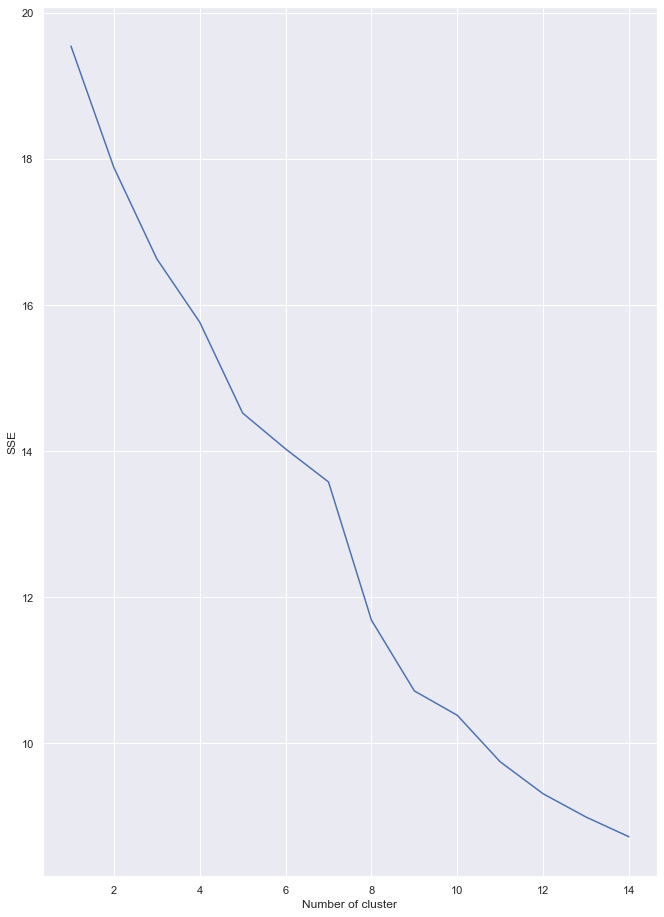

In [52]:
sse = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(trt_venues_grouped.drop('Neighborhood',axis=1))
    trt_venues_grouped['Cluster'] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

### From the above graph, we can see the optimal value for cluster is 5.

In [53]:
kmeans = KMeans(n_clusters=5,random_state=0)

In [54]:
kmeans.fit(trt_venues_grouped.drop('Neighborhood',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [55]:
trt_venues_grouped['Cluster'] = kmeans.labels_

In [56]:
trt_venues_grouped.groupby('Cluster')['Neighborhood'].count()


Cluster
0    24
1     7
2     9
3    49
4     5
Name: Neighborhood, dtype: int64

In [57]:
trt_venues_grouped.columns


Index(['Neighborhood', 'Venue Category_Accessories Store',
       'Venue Category_Airport', 'Venue Category_Airport Food Court',
       'Venue Category_Airport Lounge', 'Venue Category_Airport Service',
       'Venue Category_Airport Terminal', 'Venue Category_American Restaurant',
       'Venue Category_Antique Shop', 'Venue Category_Aquarium',
       ...
       'Venue Category_Video Game Store', 'Venue Category_Video Store',
       'Venue Category_Vietnamese Restaurant',
       'Venue Category_Warehouse Store', 'Venue Category_Wine Bar',
       'Venue Category_Wine Shop', 'Venue Category_Wings Joint',
       'Venue Category_Women's Store', 'Venue Category_Yoga Studio',
       'Cluster'],
      dtype='object', length=269)

In [58]:
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(trt_venues_grouped,on='Neighborhood')


In [59]:
neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Category_Video Game Store,Venue Category_Video Store,Venue Category_Vietnamese Restaurant,Venue Category_Warehouse Store,Venue Category_Wine Bar,Venue Category_Wine Shop,Venue Category_Wings Joint,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster
0,Agincourt,Venue Category_Lounge,Venue Category_Latin American Restaurant,Venue Category_Breakfast Spot,Venue Category_Chinese Restaurant,Venue Category_Drugstore,Venue Category_Distribution Center,Venue Category_Dog Run,Venue Category_Doner Restaurant,Venue Category_Donut Shop,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,Alderwood / Long Branch,Venue Category_Pizza Place,Venue Category_Gym,Venue Category_Skating Rink,Venue Category_Coffee Shop,Venue Category_Pharmacy,Venue Category_Pub,Venue Category_Sandwich Place,Venue Category_Yoga Studio,Venue Category_Distribution Center,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,Bathurst Manor / Wilson Heights / Downsview North,Venue Category_Coffee Shop,Venue Category_Bank,Venue Category_Frozen Yogurt Shop,Venue Category_Bridal Shop,Venue Category_Sandwich Place,Venue Category_Restaurant,Venue Category_Diner,Venue Category_Supermarket,Venue Category_Ice Cream Shop,...,0.0,0.047619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,Bayview Village,Venue Category_Japanese Restaurant,Venue Category_Café,Venue Category_Bank,Venue Category_Chinese Restaurant,Venue Category_Distribution Center,Venue Category_Dog Run,Venue Category_Doner Restaurant,Venue Category_Donut Shop,Venue Category_Drugstore,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,Bedford Park / Lawrence Manor East,Venue Category_Italian Restaurant,Venue Category_Restaurant,Venue Category_Sandwich Place,Venue Category_Coffee Shop,Venue Category_Pharmacy,Venue Category_Pub,Venue Category_Café,Venue Category_Indian Restaurant,Venue Category_Butcher,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [60]:

neighborhoods_venues_sorted.columns
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(trt_venues,on='Neighborhood')

In [61]:
map_clusters = folium.Map(location=[trt_latitude, trt_longitude], zoom_start=11)

In [62]:
x = np.arange(6)
ys = [i + x + (i*x)**2 for i in range(6)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(neighborhoods_venues_sorted['Neighborhood Latitude'], neighborhoods_venues_sorted['Neighborhood Longitude'], neighborhoods_venues_sorted['Neighborhood'], neighborhoods_venues_sorted['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

In [63]:
map_clusters

### Recommending veg restaurants

In [64]:
trt_veg = trt_venues_onehot.groupby(['Neighborhood']).sum().reset_index()
trt_veg.head()

,Neighborhood,Venue Category_Accessories Store,Venue Category_Airport,Venue Category_Airport Food Court,Venue Category_Airport Lounge,Venue Category_Airport Service,Venue Category_Airport Terminal,Venue Category_American Restaurant,Venue Category_Antique Shop,Venue Category_Aquarium,...,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Video Game Store,Venue Category_Video Store,Venue Category_Vietnamese Restaurant,Venue Category_Warehouse Store,Venue Category_Wine Bar,Venue Category_Wine Shop,Venue Category_Wings Joint,Venue Category_Women's Store,Venue Category_Yoga Studio
0,Agincourt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Alderwood / Long Branch,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Bathurst Manor / Wilson Heights / Downsview North,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,Bayview Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Bedford Park / Lawrence Manor East,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
trt_veg['Venue Category_American Restaurant']

0     0
1     0
2     0
3     0
4     1
     ..
89    0
90    0
91    0
92    0
93    0
Name: Venue Category_American Restaurant, Length: 94, dtype: uint8

In [66]:
trt_veg = trt_veg[['Neighborhood','Venue Category_American Restaurant']]


In [67]:
trt_veg.rename(columns={'Venue Category_American Restaurant':'NumberOfVegRestaurants'},inplace=True)

In [68]:
trt_veg.head()

,Neighborhood,NumberOfVegRestaurants
0,Agincourt,0
1,Alderwood / Long Branch,0
2,Bathurst Manor / Wilson Heights / Downsview North,0
3,Bayview Village,0
4,Bedford Park / Lawrence Manor East,1


In [69]:
trt_veg['NumberOfNonVeganrestaurants'] = 1-(trt_veg['NumberOfVegRestaurants']/trt_veg['NumberOfVegRestaurants'].max(axis=0))

In [70]:
trt_veg.head(10)

,Neighborhood,NumberOfVegRestaurants,NumberOfNonVeganrestaurants
0,Agincourt,0,1.00
1,Alderwood / Long Branch,0,1.00
2,Bathurst Manor / Wilson Heights / Downsview North,0,1.00
3,Bayview Village,0,1.00
4,Bedford Park / Lawrence Manor East,1,0.75
5,Berczy Park,0,1.00
6,Birch Cliff / Cliffside West,0,1.00
7,Brockton / Parkdale Village / Exhibition Place,0,1.00
8,Business reply mail Processing CentrE,0,1.00
9,CN Tower / King and Spadina / Railway Lands / ...,0,1.00


In [71]:
trt_veg.rename(columns={'Neighborhood':'Neighborhoods'},inplace=True)


### Building a target neighborhood by providing a sample restaurant : say 'Agincourt '

In [79]:
target_cluster_dataframe = neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Neighborhood']=='Agincourt']


In [80]:
target_cluster_dataframe.reset_index()


,index,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,...,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,0,Agincourt,Venue Category_Lounge,Venue Category_Latin American Restaurant,Venue Category_Breakfast Spot,Venue Category_Chinese Restaurant,Venue Category_Drugstore,Venue Category_Distribution Center,Venue Category_Dog Run,Venue Category_Doner Restaurant,...,0.0,0.0,0,Scarborough,43.7942,-79.262029,Panagio's Breakfast & Lunch,43.792370,-79.260203,Breakfast Spot
1,1,Agincourt,Venue Category_Lounge,Venue Category_Latin American Restaurant,Venue Category_Breakfast Spot,Venue Category_Chinese Restaurant,Venue Category_Drugstore,Venue Category_Distribution Center,Venue Category_Dog Run,Venue Category_Doner Restaurant,...,0.0,0.0,0,Scarborough,43.7942,-79.262029,El Pulgarcito,43.792648,-79.259208,Latin American Restaurant
2,2,Agincourt,Venue Category_Lounge,Venue Category_Latin American Restaurant,Venue Category_Breakfast Spot,Venue Category_Chinese Restaurant,Venue Category_Drugstore,Venue Category_Distribution Center,Venue Category_Dog Run,Venue Category_Doner Restaurant,...,0.0,0.0,0,Scarborough,43.7942,-79.262029,Twilight,43.791999,-79.258584,Lounge
3,3,Agincourt,Venue Category_Lounge,Venue Category_Latin American Restaurant,Venue Category_Breakfast Spot,Venue Category_Chinese Restaurant,Venue Category_Drugstore,Venue Category_Distribution Center,Venue Category_Dog Run,Venue Category_Doner Restaurant,...,0.0,0.0,0,Scarborough,43.7942,-79.262029,Royal Chinese Seafood Restaurant,43.798496,-79.262196,Chinese Restaurant


In [81]:
target_cluster = target_cluster_dataframe.iloc[0].at['Cluster']


In [82]:
target_cluster

0

In [83]:
possible_neighborhoods = neighborhoods_venues_sorted[neighborhoods_venues_sorted['Cluster']==target_cluster]
possible_neighborhoods.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Agincourt,Venue Category_Lounge,Venue Category_Latin American Restaurant,Venue Category_Breakfast Spot,Venue Category_Chinese Restaurant,Venue Category_Drugstore,Venue Category_Distribution Center,Venue Category_Dog Run,Venue Category_Doner Restaurant,Venue Category_Donut Shop,...,0.0,0.0,0,Scarborough,43.794200,-79.262029,Panagio's Breakfast & Lunch,43.792370,-79.260203,Breakfast Spot
1,Agincourt,Venue Category_Lounge,Venue Category_Latin American Restaurant,Venue Category_Breakfast Spot,Venue Category_Chinese Restaurant,Venue Category_Drugstore,Venue Category_Distribution Center,Venue Category_Dog Run,Venue Category_Doner Restaurant,Venue Category_Donut Shop,...,0.0,0.0,0,Scarborough,43.794200,-79.262029,El Pulgarcito,43.792648,-79.259208,Latin American Restaurant
2,Agincourt,Venue Category_Lounge,Venue Category_Latin American Restaurant,Venue Category_Breakfast Spot,Venue Category_Chinese Restaurant,Venue Category_Drugstore,Venue Category_Distribution Center,Venue Category_Dog Run,Venue Category_Doner Restaurant,Venue Category_Donut Shop,...,0.0,0.0,0,Scarborough,43.794200,-79.262029,Twilight,43.791999,-79.258584,Lounge
3,Agincourt,Venue Category_Lounge,Venue Category_Latin American Restaurant,Venue Category_Breakfast Spot,Venue Category_Chinese Restaurant,Venue Category_Drugstore,Venue Category_Distribution Center,Venue Category_Dog Run,Venue Category_Doner Restaurant,Venue Category_Donut Shop,...,0.0,0.0,0,Scarborough,43.794200,-79.262029,Royal Chinese Seafood Restaurant,43.798496,-79.262196,Chinese Restaurant
4,Alderwood / Long Branch,Venue Category_Pizza Place,Venue Category_Gym,Venue Category_Skating Rink,Venue Category_Coffee Shop,Venue Category_Pharmacy,Venue Category_Pub,Venue Category_Sandwich Place,Venue Category_Yoga Studio,Venue Category_Distribution Center,...,0.0,0.0,0,Etobicoke,43.602414,-79.543484,Il Paesano Pizzeria & Restaurant,43.601280,-79.545028,Pizza Place


In [84]:
print("There are {} neighborhoods which has similar characteristics to Whitefield.".format(possible_neighborhoods.shape[0]))

There are 323 neighborhoods which has similar characteristics to Whitefield.


In [85]:
possible_neighborhoods.reset_index().head()


,index,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,...,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,0,Agincourt,Venue Category_Lounge,Venue Category_Latin American Restaurant,Venue Category_Breakfast Spot,Venue Category_Chinese Restaurant,Venue Category_Drugstore,Venue Category_Distribution Center,Venue Category_Dog Run,Venue Category_Doner Restaurant,...,0.0,0.0,0,Scarborough,43.794200,-79.262029,Panagio's Breakfast & Lunch,43.792370,-79.260203,Breakfast Spot
1,1,Agincourt,Venue Category_Lounge,Venue Category_Latin American Restaurant,Venue Category_Breakfast Spot,Venue Category_Chinese Restaurant,Venue Category_Drugstore,Venue Category_Distribution Center,Venue Category_Dog Run,Venue Category_Doner Restaurant,...,0.0,0.0,0,Scarborough,43.794200,-79.262029,El Pulgarcito,43.792648,-79.259208,Latin American Restaurant
2,2,Agincourt,Venue Category_Lounge,Venue Category_Latin American Restaurant,Venue Category_Breakfast Spot,Venue Category_Chinese Restaurant,Venue Category_Drugstore,Venue Category_Distribution Center,Venue Category_Dog Run,Venue Category_Doner Restaurant,...,0.0,0.0,0,Scarborough,43.794200,-79.262029,Twilight,43.791999,-79.258584,Lounge
3,3,Agincourt,Venue Category_Lounge,Venue Category_Latin American Restaurant,Venue Category_Breakfast Spot,Venue Category_Chinese Restaurant,Venue Category_Drugstore,Venue Category_Distribution Center,Venue Category_Dog Run,Venue Category_Doner Restaurant,...,0.0,0.0,0,Scarborough,43.794200,-79.262029,Royal Chinese Seafood Restaurant,43.798496,-79.262196,Chinese Restaurant
4,4,Alderwood / Long Branch,Venue Category_Pizza Place,Venue Category_Gym,Venue Category_Skating Rink,Venue Category_Coffee Shop,Venue Category_Pharmacy,Venue Category_Pub,Venue Category_Sandwich Place,Venue Category_Yoga Studio,...,0.0,0.0,0,Etobicoke,43.602414,-79.543484,Il Paesano Pizzeria & Restaurant,43.601280,-79.545028,Pizza Place


In [86]:
possible_neighborhoods.rename(columns={'Neighborhood':'Neighborhoods'},inplace=True)


C:\Users\Dnyaneshwari Shinde\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


### Possible neighbourhoods with most common venues

In [91]:

possible_neighborhoods = possible_neighborhoods.merge(trt_veg[['Neighborhoods','NumberOfVegRestaurants','NumberOfNonVeganrestaurants']],on='Neighborhoods')

In [92]:
possible_neighborhoods.head()

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,NumberOfVegRestaurants_x,NumberOfNonVeganrestaurants_x,NumberOfVegRestaurants_y,NumberOfNonVeganrestaurants_y
0,Agincourt,Venue Category_Lounge,Venue Category_Latin American Restaurant,Venue Category_Breakfast Spot,Venue Category_Chinese Restaurant,Venue Category_Drugstore,Venue Category_Distribution Center,Venue Category_Dog Run,Venue Category_Doner Restaurant,Venue Category_Donut Shop,...,43.794200,-79.262029,Panagio's Breakfast & Lunch,43.792370,-79.260203,Breakfast Spot,0,1.0,0,1.0
1,Agincourt,Venue Category_Lounge,Venue Category_Latin American Restaurant,Venue Category_Breakfast Spot,Venue Category_Chinese Restaurant,Venue Category_Drugstore,Venue Category_Distribution Center,Venue Category_Dog Run,Venue Category_Doner Restaurant,Venue Category_Donut Shop,...,43.794200,-79.262029,El Pulgarcito,43.792648,-79.259208,Latin American Restaurant,0,1.0,0,1.0
2,Agincourt,Venue Category_Lounge,Venue Category_Latin American Restaurant,Venue Category_Breakfast Spot,Venue Category_Chinese Restaurant,Venue Category_Drugstore,Venue Category_Distribution Center,Venue Category_Dog Run,Venue Category_Doner Restaurant,Venue Category_Donut Shop,...,43.794200,-79.262029,Twilight,43.791999,-79.258584,Lounge,0,1.0,0,1.0
3,Agincourt,Venue Category_Lounge,Venue Category_Latin American Restaurant,Venue Category_Breakfast Spot,Venue Category_Chinese Restaurant,Venue Category_Drugstore,Venue Category_Distribution Center,Venue Category_Dog Run,Venue Category_Doner Restaurant,Venue Category_Donut Shop,...,43.794200,-79.262029,Royal Chinese Seafood Restaurant,43.798496,-79.262196,Chinese Restaurant,0,1.0,0,1.0
4,Alderwood / Long Branch,Venue Category_Pizza Place,Venue Category_Gym,Venue Category_Skating Rink,Venue Category_Coffee Shop,Venue Category_Pharmacy,Venue Category_Pub,Venue Category_Sandwich Place,Venue Category_Yoga Studio,Venue Category_Distribution Center,...,43.602414,-79.543484,Il Paesano Pizzeria & Restaurant,43.601280,-79.545028,Pizza Place,0,1.0,0,1.0


#### So here the most possible neighbourhoods with most common venues